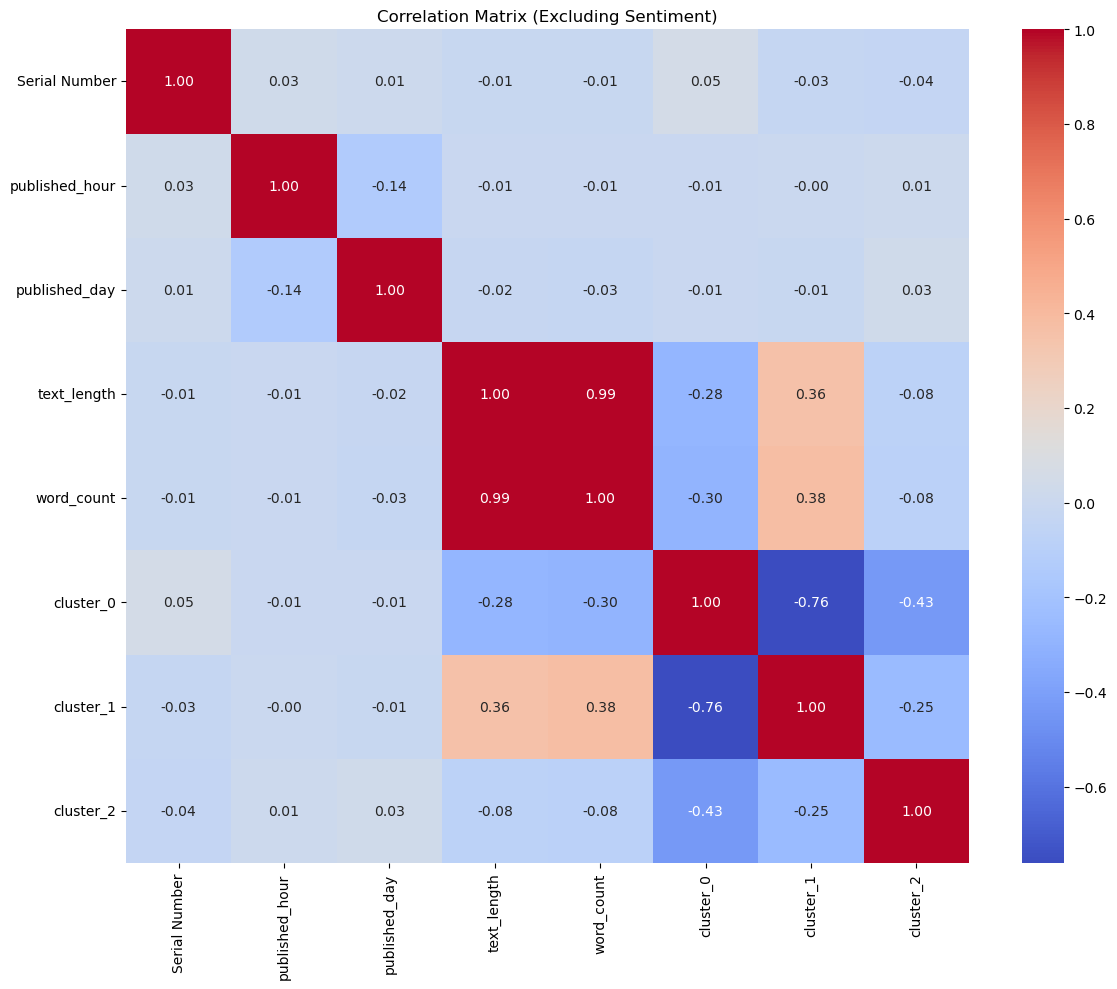


Descriptive Statistics by Cluster:
         text_length  word_count  published_hour  published_day
cluster                                                        
0              75.53       13.49           11.04           2.74
1             259.12       45.65           11.06           2.71
2              86.03       15.45           11.24           2.90


C:\Users\neeraj\AppData\Local\Temp\ipykernel_31424\2537524852.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='word_count', data=df, palette='Set2')


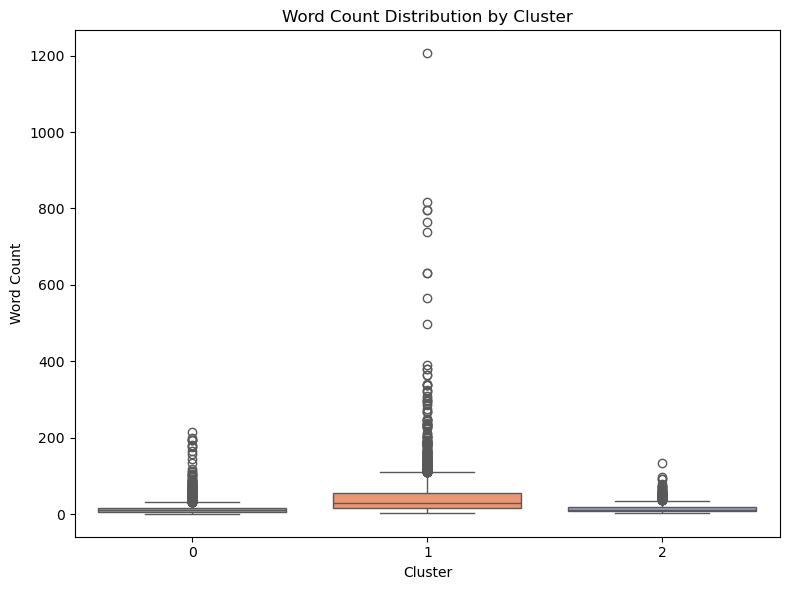

C:\Users\neeraj\AppData\Local\Temp\ipykernel_31424\2537524852.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='text_length', data=df, palette='Set3')


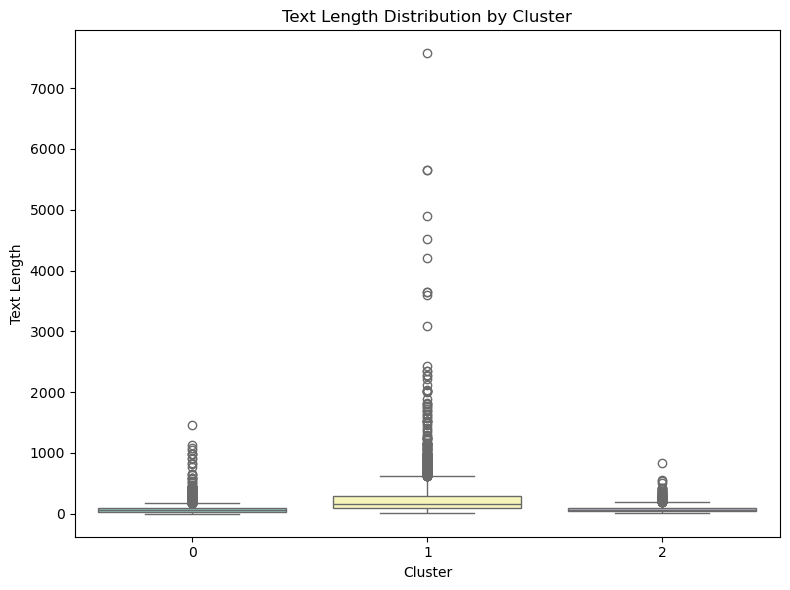

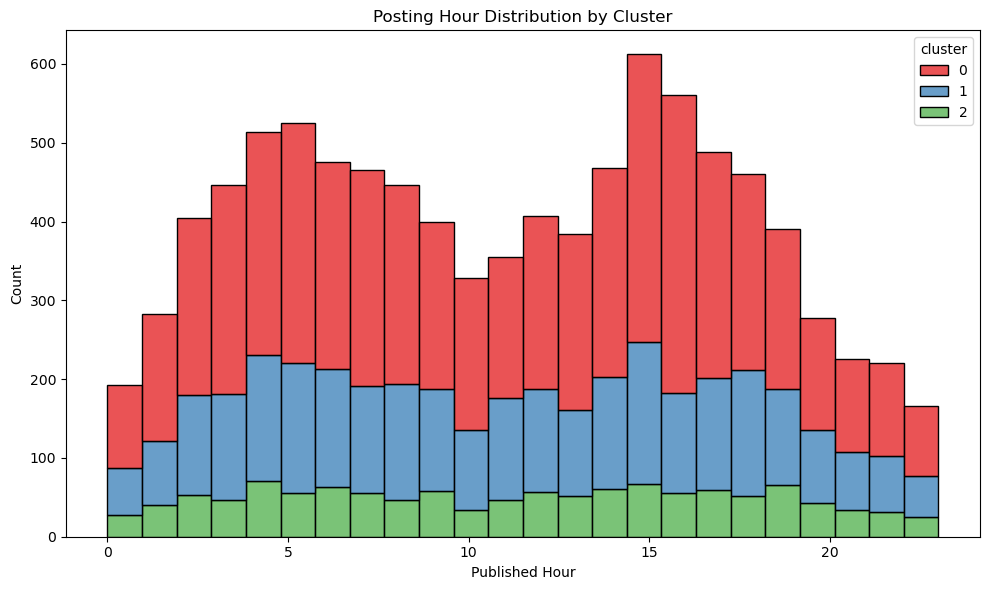

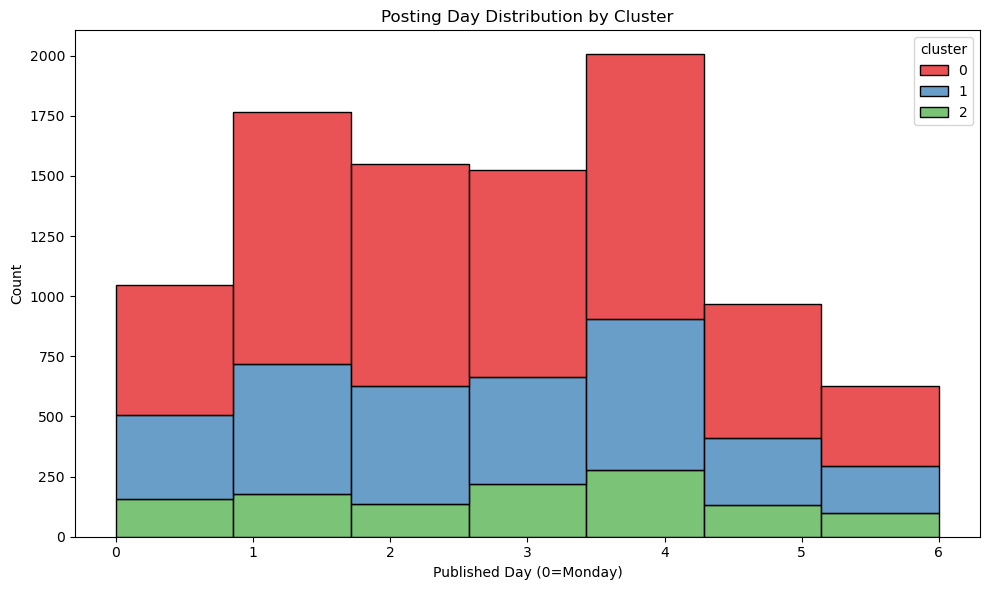

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('antara_mam_yt_withsentiment.csv')

# Convert datetime to numeric features
df['published_hour'] = pd.to_datetime(df['Published At']).dt.hour
df['published_day'] = pd.to_datetime(df['Published At']).dt.dayofweek

# Extract text features
df['text_length'] = df['processed_content'].str.len()
df['word_count'] = df['processed_content'].str.split().str.len()

# One-hot encode cluster (not sentiment) for correlation
cluster_dummies = pd.get_dummies(df['cluster'], prefix='cluster')

# Combine numerical and cluster data for correlation matrix
features_df = pd.concat([
    df[['Serial Number', 'published_hour', 'published_day', 'text_length', 'word_count']],
    cluster_dummies
], axis=1)

# Correlation matrix
correlation_matrix = features_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Excluding Sentiment)')
plt.tight_layout()
plt.show()

# Descriptive statistics grouped by cluster
print("\nDescriptive Statistics by Cluster:")
print(df.groupby('cluster')[['text_length', 'word_count', 'published_hour', 'published_day']].mean().round(2))

# Boxplot: Word count per cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='word_count', data=df, palette='Set2')
plt.title('Word Count Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

# Boxplot: Text length per cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='text_length', data=df, palette='Set3')
plt.title('Text Length Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Text Length')
plt.tight_layout()
plt.show()

# Count plot: Published hour distribution by cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='published_hour', hue='cluster', multiple='stack', palette='Set1', bins=24)
plt.title('Posting Hour Distribution by Cluster')
plt.xlabel('Published Hour')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Count plot: Published day distribution by cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='published_day', hue='cluster', multiple='stack', palette='Set1', bins=7)
plt.title('Posting Day Distribution by Cluster')
plt.xlabel('Published Day (0=Monday)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [4]:
#  🟢 Cluster 1 (Most Likely Positive/Informative)
# Much longer content: Highest average text length (259.12) and word count (45.65).

# Likely contains detailed, thoughtful, or informative comments/articles.

# Could represent positive or neutral sentiments with rich content.

# 2. 🔴 Cluster 0 (Most Likely Negative or Brief Responses)
# Shortest comments: Only 13.49 words on average, lowest text length.

# Could be short negative remarks, hate speech, or dismissive replies.

# 3. 🟡 Cluster 2 (Possibly Neutral or Mixed)
# Slightly longer than cluster 0 but much shorter than cluster 1.

# May contain brief neutral or mixed sentiment content—not too long, not too short.



In [5]:
# How to Interpret Your Correlation Matrix
# 1. Check correlation between text_length and word_count
# ✅ Expectation: High positive correlation (close to +1)

# 🔍 Interpretation: Longer texts tend to have more words. Confirms logical consistency.

# 2. Look at how clusters correlate with text features
# Example: If cluster_2 has high positive correlation with word_count, that means cluster 2 contains longer content.

# Another example: If cluster_0 shows slight positive correlation with published_hour, that might mean it's more active at certain times.

# 3. Check temporal correlations
# If published_hour or published_day has noticeable correlation with a cluster (even weak, say ~0.2), it may hint that certain sentiment groups are more active at certain times/days.

In [6]:
# TREND ANALYSIS

In [7]:
#  Types of Trend Analyses You Can Do
# 1. Cluster Frequency Over Time
# Track how the frequency of each cluster (e.g., positive/negative/neutral) varies over days or weeks.

# 📈 Helps show if public sentiment or news tone is increasing/decreasing.

# 2. Volume of Posts Over Time
# Number of articles/comments published per day/week.

# Shows peaks in activity or user engagement trends.

# 3. Average Word Count or Text Length Over Time
# Indicates whether people are writing more or less over time.

# 4. Topic Trends (if you used keyword extraction or TF-IDF)
# Plot how the frequency of certain keywords/topics evolves.

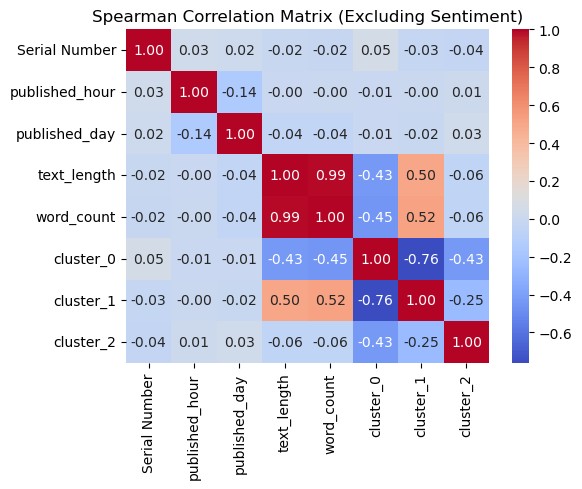


Descriptive Statistics by Cluster:
         text_length  word_count  published_hour  published_day
cluster                                                        
0              75.53       13.49           11.04           2.74
1             259.12       45.65           11.06           2.71
2              86.03       15.45           11.24           2.90


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('antara_mam_yt_withsentiment.csv')

# Convert datetime to numeric features
df['published_hour'] = pd.to_datetime(df['Published At']).dt.hour
df['published_day'] = pd.to_datetime(df['Published At']).dt.dayofweek

# Extract text features
df['text_length'] = df['processed_content'].str.len()
df['word_count'] = df['processed_content'].str.split().str.len()

# One-hot encode cluster (not sentiment) for correlation
cluster_dummies = pd.get_dummies(df['cluster'], prefix='cluster')

# Combine numerical and cluster data for correlation matrix
features_df = pd.concat([
    df[['Serial Number', 'published_hour', 'published_day', 'text_length', 'word_count']],
    cluster_dummies
], axis=1)

# Spearman correlation matrix
correlation_matrix_spearman = features_df.corr(method='spearman')

# Plotting the Spearman correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix (Excluding Sentiment)')
plt.tight_layout()
plt.show()

# Descriptive statistics grouped by cluster
print("\nDescriptive Statistics by Cluster:")
print(df.groupby('cluster')[['text_length', 'word_count', 'published_hour', 'published_day']].mean().round(2))



In [ ]:
# The descriptive statistics for each cluster offer insightful distinctions in content characteristics among the grouped news articles. Notably, Cluster 1 exhibits the highest average text length (259.12 characters) and word count (45.65 words), suggesting that this group primarily consists of more detailed or elaborative news articles. Such content may include analytical pieces or in-depth reports related to air pollution, potentially reflecting more neutral or informative sentiment.

# In contrast, Cluster 0 and Cluster 2 represent significantly shorter articles, with average text lengths of 75.53 and 86.03 characters, and word counts of 13.49 and 15.45 words, respectively. These clusters likely include headlines, summaries, or brief commentaries, which may lean more toward positive or negative sentiment due to their concise and emotionally charged language.

# Across all clusters, the average published hour is relatively consistent, centered around 11 AM, indicating a general trend in news article publication timing, regardless of content length or cluster. Similarly, the published day averages fall close to mid-week (2.7 to 2.9 on a 0–6 scale, where 0 = Monday), suggesting that most articles are published between Wednesday and Thursday, possibly aligning with peak audience engagement periods or scheduled media releases.

# Overall, the statistical analysis reveals that cluster-specific content structures (length and wordiness) are crucial in shaping sentiment and topic density, which is essential for sentiment modeling in environmental discourse such as air pollution.